In [1]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, KBinsDiscretizer, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
train = pd.read_csv('train.csv',parse_dates=True,index_col=0)
test = pd.read_csv('test.csv',parse_dates=True,index_col=0)
train = train.reset_index()
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [3]:
train["hour"] = [t.hour for t in pd.DatetimeIndex(train['datetime'])]
train["day"] = [t.dayofweek for t in pd.DatetimeIndex(train['datetime'])]
train["month"] = [t.month for t in pd.DatetimeIndex(train['datetime'])]
train['year'] = [t.year for t in pd.DatetimeIndex(train['datetime'])]
train['year'] = train['year'].map({2011:0, 2012:1})

In [4]:
test = test.reset_index()

In [5]:
test["hour"] = [t.hour for t in pd.DatetimeIndex(test['datetime'])]
test["day"] = [t.dayofweek for t in pd.DatetimeIndex(test['datetime'])]
test["month"] = [t.month for t in pd.DatetimeIndex(test['datetime'])]
test['year'] = [t.year for t in pd.DatetimeIndex(test['datetime'])]
test['year'] = test['year'].map({2011:0, 2012:1})

In [6]:
train.holiday.value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [7]:
pd.crosstab(train['count'],train['workingday'])

workingday,0,1
count,,
1,21,84
2,25,107
3,27,117
4,27,122
5,35,134
...,...,...
943,0,1
948,0,1
968,0,1


1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

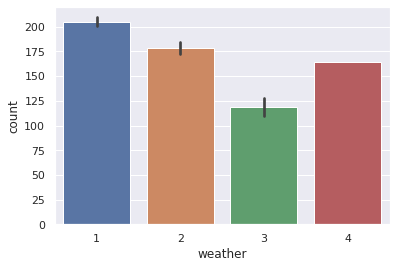

In [8]:
sns.barplot(x='weather', y='count', data=train)
train.weather.value_counts()

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, 'Count over Working Day')]

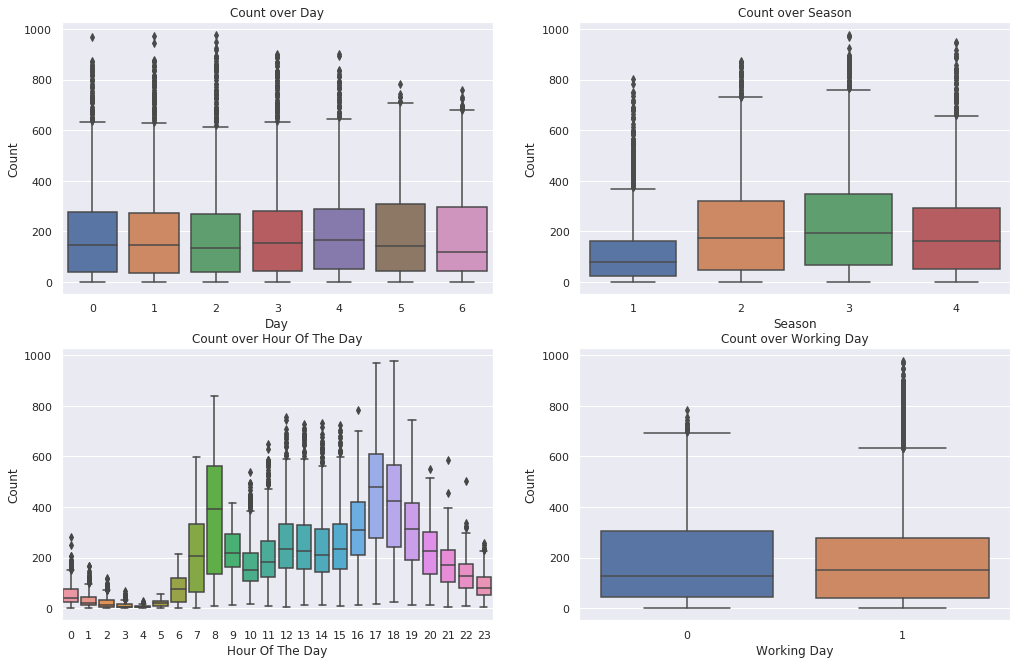

In [9]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(17,11)
sns.boxplot(data=train,y='count',x='day',orient='v',ax=axes[0][0])
sns.boxplot(data=train,y='count',x='season',orient='v',ax=axes[0][1])
sns.boxplot(data=train,y='count',x='hour',orient='v',ax=axes[1][0])
sns.boxplot(data=train,y='count',x='workingday',orient='v',ax=axes[1][1])

axes[0][0].set(xlabel='Day', ylabel='Count',title='Count over Day')
axes[0][1].set(xlabel='Season', ylabel='Count',title="Count over Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title='Count over Hour Of The Day')
axes[1][1].set(xlabel='Working Day', ylabel='Count',title='Count over Working Day')

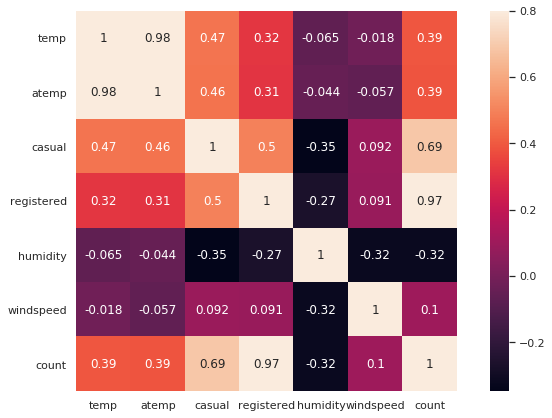

In [10]:
corr = train[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
fig,ax= plt.subplots(figsize=(12,7))
sns.heatmap(corr, vmax=0.8, square=True,annot=True)

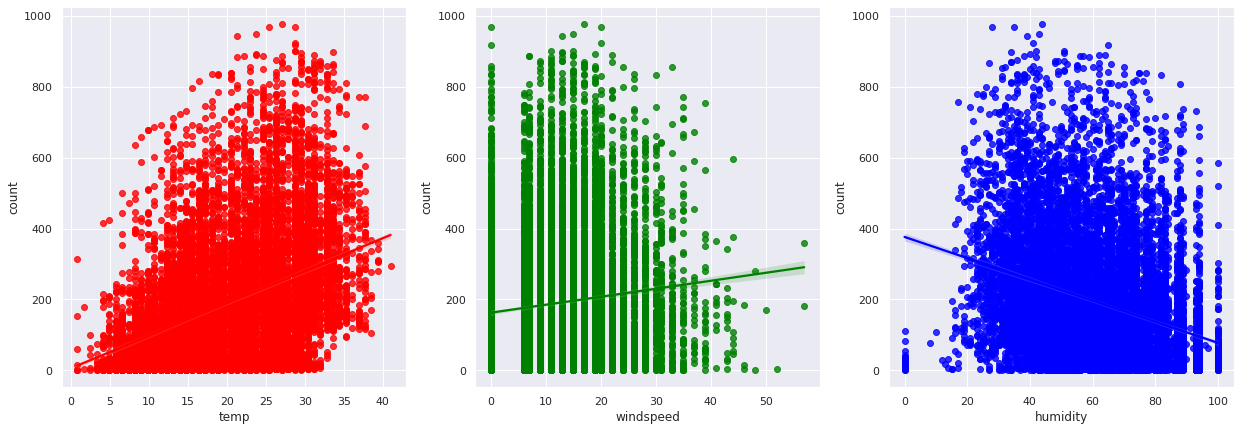

In [11]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(21,7))
sns.regplot(x='temp', y='count', data=train,ax=ax1, color='red')
sns.regplot(x='windspeed', y='count', data=train,ax=ax2, color='green')
sns.regplot(x='humidity', y='count', data=train,ax=ax3, color='blue')

In [12]:
train  = train.drop(["datetime"],axis=1)
test = test.drop(["datetime"],axis=1)
test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day,month,year
0,1,0,1,1,10.66,11.365,56,26.0027,0,3,1,0
1,1,0,1,1,10.66,13.635,56,0.0000,1,3,1,0
2,1,0,1,1,10.66,13.635,56,0.0000,2,3,1,0
3,1,0,1,1,10.66,12.880,56,11.0014,3,3,1,0
4,1,0,1,1,10.66,12.880,56,11.0014,4,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,19,0,12,1
6489,1,0,1,2,10.66,12.880,60,11.0014,20,0,12,1
6490,1,0,1,1,10.66,12.880,60,11.0014,21,0,12,1
6491,1,0,1,1,10.66,13.635,56,8.9981,22,0,12,1


In [13]:
X = train[['season','holiday','workingday','weather','atemp','windspeed','hour','day','humidity']] 
y = train['count'] 

In [14]:
scaler = StandardScaler()
X = scaler.fit_transform(X.values.reshape(-1,1))
X

array([[-0.592185  ],
       [-0.64129231],
       [-0.64129231],
       ...,
       [ 0.48817573],
       [-0.5430777 ],
       [ 2.5997899 ]])

In [15]:
X.shape, y.shape

((97974, 1), (10886,))

In [16]:
Xtrain = train[['season','holiday','workingday','weather','atemp','windspeed','hour','day','humidity']]
ytrain = train['count']
Xtest = test

In [17]:
Xtest.shape

(6493, 12)

In [18]:
trans = ColumnTransformer([
    ('dan_bins', KBinsDiscretizer(n_bins=5, encode='onehot-dense', strategy='uniform'), ['hour']),
    ('d_scale', MinMaxScaler(), ['atemp','windspeed']),
    ('missing', SimpleImputer(strategy='median'), ['humidity']),
    ('do_nothing', 'passthrough', ['holiday', 'workingday','weather','day','season']),
])

In [19]:
X_tr = trans.fit(Xtrain)
X_tr = trans.transform(Xtrain)  
X_tr.shape

(10886, 13)

In [20]:
lrm = LinearRegression().fit(X_tr, ytrain)
lrm_ridge = Ridge(alpha=2)  
lrm_lasso = Lasso(alpha=0.5)
lrm_elastic = ElasticNet(alpha=0.1, l1_ratio=0.2)

In [21]:
X_ts = trans.transform(Xtest)
X_ts.shape

/home/daniel/anaconda3/lib/python3.7/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


(6493, 13)

In [22]:
ypred = lrm.predict(X_ts)

[Text(0.5, 1.0, 'Test Set Distribution')]

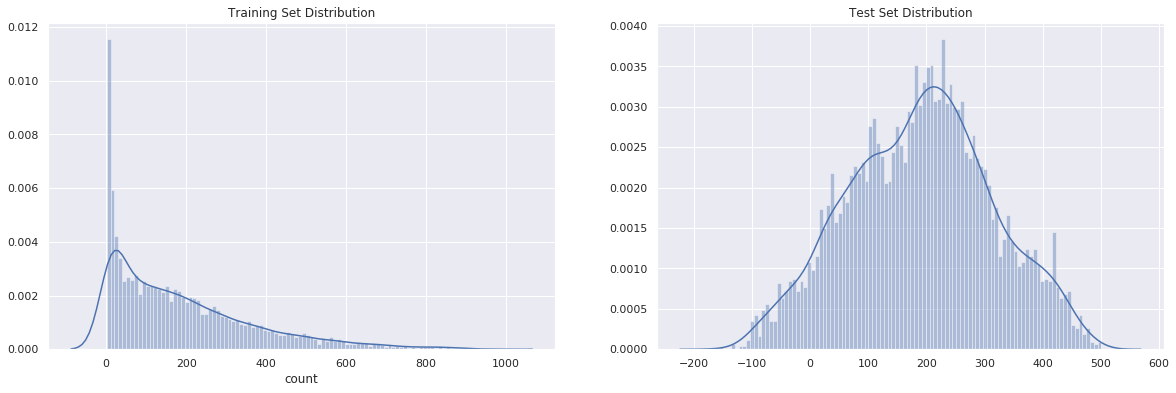

In [23]:
#ypred = lrm.predict(X_ts)
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(20,6)
sns.distplot(ytrain,ax=ax1,bins=100)
sns.distplot(ypred,ax=ax2,bins=100)
ax1.set(title="Training Set Distribution")
ax2.set(title="Test Set Distribution")

In [24]:
cross_validation = cross_validate(lrm,Xtrain,ytrain,cv=10,return_train_score=True)

In [25]:
cross_validation['train_score'].mean()

0.33676872298553207

In [26]:
cross_validation['test_score'].mean()

-0.06812514749649812

In [27]:
lrm.score(X_tr, ytrain)

0.4441281058898439

In [28]:
lrm.intercept_

111.55246893556519

In [29]:
passengerId = test.index
predict = pd.DataFrame( {'X': passengerId, 'count': ypred} )

In [31]:
predict.to_csv('bike_pred.csv', index=False)